# Facebook prophet mmodel for Time-Series Forecasting

In [5]:
import prophet

In [6]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [7]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [8]:
df=pd.read_csv("/content/covid_19_clean_complete.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [9]:
df.shape

(49068, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [13]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [14]:
df['Date'].nunique()

188

In [15]:
total = df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

In [16]:
total

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


# Facebook Prophet Model

In [17]:
df_prophet = total.rename(columns={'Date':'ds','Confirmed':'y'})

In [18]:
df_prophet

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


In [19]:
from prophet import Prophet

In [20]:
m= Prophet()

In [21]:
model= m.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwey64ort/qu2cwjoz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwey64ort/q4c_ecd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27377', 'data', 'file=/tmp/tmpwey64ort/qu2cwjoz.json', 'init=/tmp/tmpwey64ort/q4c_ecd7.json', 'output', 'file=/tmp/tmpwey64ort/prophet_modeli7fo9wim/prophet_model-20231118071049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [23]:
# Added 100 more rows
future_global = model.make_future_dataframe(periods=100,freq='D')

In [24]:
future_global

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
283,2020-10-31
284,2020-11-01
285,2020-11-02
286,2020-11-03


# Prediction

In [25]:
prediction= model.predict(future_global)

In [26]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.215393e+05,8.663411e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.130779e+05,9.514055e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.052023e+05,1.064773e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-8.204919e+04,1.210043e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.789389e+04,1.136970e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2020-10-31,3.571614e+07,3.300079e+07,3.851836e+07,3.301710e+07,3.855701e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,3.572989e+07
284,2020-11-01,3.592013e+07,3.315485e+07,3.879380e+07,3.319369e+07,3.878547e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,3.592742e+07
285,2020-11-02,3.612412e+07,3.333749e+07,3.900257e+07,3.335412e+07,3.903005e+07,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,0.0,0.0,0.0,3.612201e+07
286,2020-11-03,3.632811e+07,3.344173e+07,3.926171e+07,3.349689e+07,3.925874e+07,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,0.0,0.0,0.0,3.631126e+07


In [27]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
283,2020-10-31,3.572989e+07,3.300079e+07,3.851836e+07
284,2020-11-01,3.592742e+07,3.315485e+07,3.879380e+07
285,2020-11-02,3.612201e+07,3.333749e+07,3.900257e+07
286,2020-11-03,3.631126e+07,3.344173e+07,3.926171e+07
287,2020-11-04,3.652103e+07,3.364697e+07,3.947855e+07


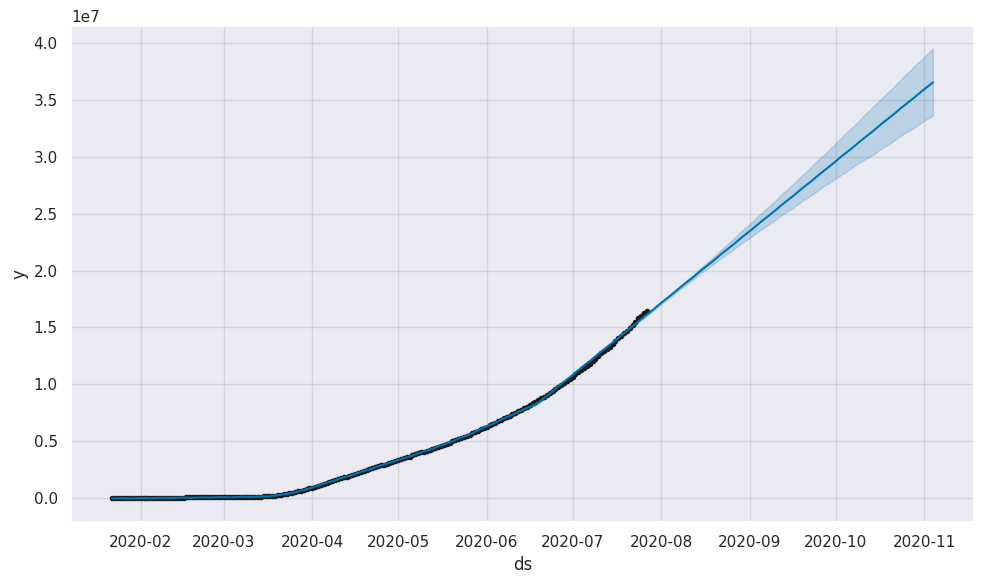

In [29]:
# plot the model
model.plot(prediction)
plt.show()

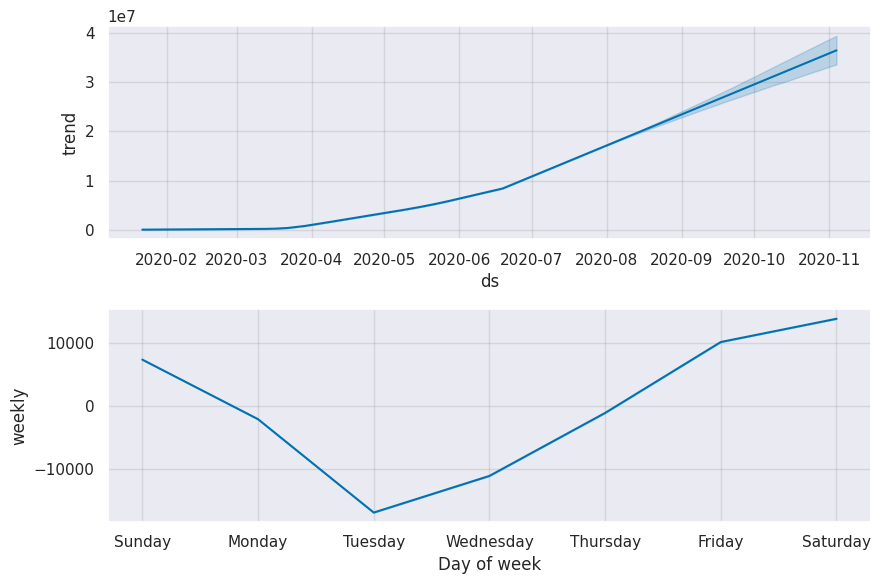

In [31]:
model.plot_components(prediction)
plt.show()

In [32]:
from prophet.plot import add_changepoints_to_plot

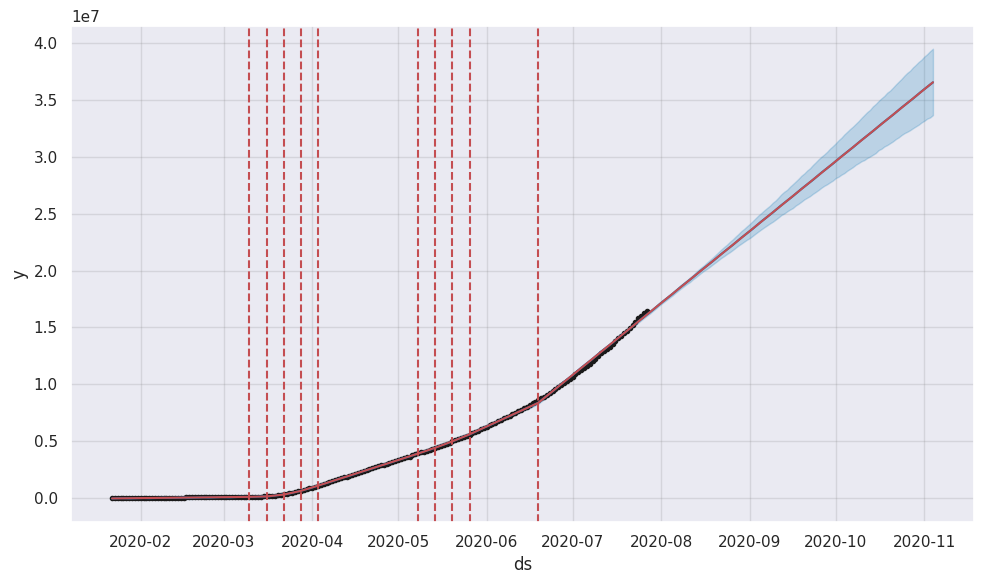

In [33]:
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(),model,prediction)
plt.show()

In [36]:
from prophet.diagnostics import cross_validation

In [37]:
df_cv= cross_validation(model,horizon='30 days',period='15 days',initial='90 days')

INFO:prophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwey64ort/83shhcj_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwey64ort/7ofu0joj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11591', 'data', 'file=/tmp/tmpwey64ort/83shhcj_.json', 'init=/tmp/tmpwey64ort/7ofu0joj.json', 'output', 'file=/tmp/tmpwey64ort/prophet_model_eb9idtw/prophet_model-20231118073250.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:32:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwey64ort/sgl1y7o6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwey64ort/tbr7700f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [38]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201061e+06,3.195985e+06,3.206322e+06,3185195,2020-04-28
1,2020-04-30,3.285430e+06,3.278970e+06,3.291646e+06,3268876,2020-04-28
2,2020-05-01,3.369637e+06,3.361436e+06,3.377822e+06,3355922,2020-04-28
3,2020-05-02,3.450899e+06,3.438537e+06,3.463314e+06,3437608,2020-04-28
4,2020-05-03,3.530362e+06,3.511251e+06,3.547865e+06,3515244,2020-04-28
...,...,...,...,...,...,...
145,2020-07-23,1.315181e+07,1.288756e+07,1.341885e+07,15510481,2020-06-27
146,2020-07-24,1.329127e+07,1.301929e+07,1.358025e+07,15791645,2020-06-27
147,2020-07-25,1.342757e+07,1.313039e+07,1.371731e+07,16047190,2020-06-27
148,2020-07-26,1.354626e+07,1.324138e+07,1.384476e+07,16251796,2020-06-27


In [39]:
from prophet.diagnostics import performance_metrics

In [40]:
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.718326e+10,1.648735e+05,1.290999e+05,0.016856,0.017637,0.017038,0.000000
1,4 days,3.765761e+10,1.940557e+05,1.512684e+05,0.019316,0.022429,0.019560,0.000000
2,5 days,5.164256e+10,2.272500e+05,1.750844e+05,0.021764,0.025689,0.022083,0.066667
3,6 days,6.930525e+10,2.632589e+05,2.020559e+05,0.024541,0.026682,0.024952,0.133333
4,7 days,9.005171e+10,3.000862e+05,2.323998e+05,0.027823,0.031241,0.028347,0.200000
5,8 days,1.144856e+11,3.383572e+05,2.642448e+05,0.031131,0.034902,0.031789,0.200000
6,9 days,1.400572e+11,3.742422e+05,2.955423e+05,0.034316,0.038826,0.035118,0.200000
7,10 days,1.687479e+11,4.107893e+05,3.262500e+05,0.037358,0.043954,0.038309,0.200000
8,11 days,2.012043e+11,4.485580e+05,3.572267e+05,0.040350,0.048874,0.041452,0.200000
9,12 days,2.437495e+11,4.937099e+05,3.925093e+05,0.043527,0.052054,0.044809,0.200000


In [41]:
from prophet.plot import plot_cross_validation_metric

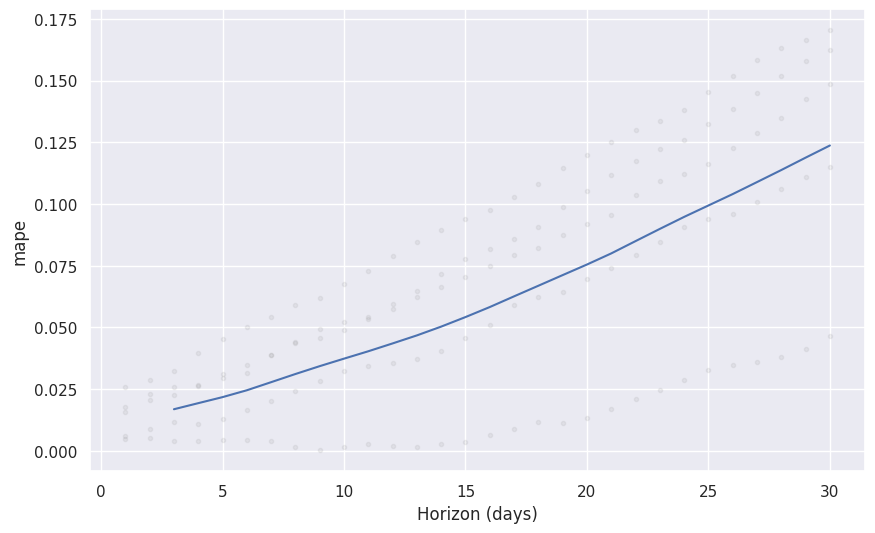

In [42]:
df_performance = plot_cross_validation_metric(df_cv, metric='mape')